In [1]:
import random
from utils import *
from math import ceil ,sqrt
import time
import matplotlib.pyplot as plt
import numpy as np

#library to generate prime(nBits)
#pip install pycryptodome
from Crypto.Util.number import getPrime

In [3]:
def Encrypt(message, n, e):
    cipher = ""
    noChar =  getNumberOfChars(n)
    maxCipherLength = len(str(n-1)) 
    for i in range(0, len(message), noChar):
        blockToEncrypt =  ConvertToInt(message[:noChar]) #indexing outofbounds works fine in python
        cipherdBlock = str( PowerMod(blockToEncrypt, e, n))
        if (len(cipherdBlock) < maxCipherLength):  #make sure all cipher blocks are the same length
            cipherdBlock = cipherdBlock.zfill(maxCipherLength)
        cipher += cipherdBlock
        message = message[noChar:]
    return cipher
    
def Encrypt_no_split(m, n, e):
    c = PowerMod(ConvertToInt(m),e, n)
    return c
    

In [4]:
def Decrypt(cipher,n, d):
    maxCipherLength = len(str(n-1))
    message = ""
    for i in range(0, len(cipher), maxCipherLength):
        blockToDecrypt = int(cipher[:maxCipherLength])
        message +=  ConvertToStr( PowerMod(blockToDecrypt, d, n))
        cipher = cipher[maxCipherLength:]
    return message

def Decrypt_no_split(c, n, d):
    m = ConvertToStr(PowerMod( c , d , n))
    return m

In [5]:

#implement RSA Algorithm to generate public and private key
def RSA_key_generator(p,q):
    n = p*q
    phi = (p-1)*(q-1)
    e = random.randint(2,phi-1)     #choose e randomly from 1 to phi
    while  GCD(e,phi) != 1:
        e = random.randint(2,phi-1)
    d =  InverseModulo(e,phi)
    return (e,d,n)

In [24]:
#generate two random integers from the array of prime numbers
def generate_two_prime_numbers(nBits  ):
    p = getPrime(nBits )
    q = getPrime(nBits )
    while p == q:
        q = getPrime(nBits )
    return (p,q)

## test the RSA encryption & decryption


In [10]:
#genertate two random integers from the array of prime numbers
(p,q) = generate_two_prime_numbers(1024)

#generate public and private key
(e,d,n) = RSA_key_generator(p,q)

message = "Hello world "

#encrypt the message
cypher = Encrypt(message,n,d)

#decrypt the message
decrypted_message = Decrypt(cypher,n,e)

#print the  decrypted message
print(decrypted_message)


Hello world 


## plot n  vs time to encrypt & decrypt

In [12]:
'''
TODO:
1)calculate encryption time for different key lenghts 
2)plot a graph of RSA encryption time vs. Key length

Note :in (1) IDK how big n should be (or how you should increase it every time) to statisfy the TA LOL
'''
def gen_diff_keys(st , end):
    n_List  =[]
    e_List  =[]
    d_List =[]
    for i in range(st , end):
        p ,q = generate_two_prime_numbers(nBits= i // 2)
        (e,d,n) = RSA_key_generator(p,q) 
        n_List.append(n)
        e_List.append(e)
        d_List.append(d)
    return n_List , d_List , e_List

def get_time_encrypt_decrypt(st , end , message):
    (n_list , d_list , e_list) =gen_diff_keys(st,end)
    time_list = []   
    for i in range(0,len(n_list)):
        start  = time.time()
        cypher = Encrypt_no_split(message,n_list[i],e_list[i])
        msg    = Decrypt_no_split(cypher , n_list[i], d_list[i])
        end = time.time()
        time_list.append(end-start)
    return time_list

In [ ]:
message = "omar mohamed ahmed "
st , end = 128 , 2048
time_list = get_time_encrypt_decrypt(st , end , message)

In [ ]:
key_length = np.arange(st,end)

print('max time = ', max(time_list) )
plt.plot(key_length,time_list)
plt.show()

## Brute Force Attack

In [25]:
'''
TODO:
1)Implement brute force (mathematical attack) on RSA algorithm using different values for n ✅
2)plot a graph of Time to break the private key (in seconds) versus value of n. Discuss the results you obtain. ✅
'''
def get_p_q (n):
    for i in range(2 , int(sqrt(n))):
        if (n % i == 0) :
            return i , n // i
    
def brute_force_attack (n , e , cypher ):
    p ,q = get_p_q(n)
    phi = (p-1) * (q-1)
    d =  InverseModulo(e,phi)    
    m = Decrypt(cypher , n , d)
    return m
    

def test_brute_force(keySize , message , debug=0):
    # generate the key
    if debug == 1: print(f'-----------\nstart brute force .... ') 
    if debug == 1: print(f'key Size = {keySize}....') 
    (p,q) = generate_two_prime_numbers(keySize // 2)
    (e,d,n) = RSA_key_generator(p,q)
    if debug == 1: print('p , q are genrated .... ') 
    
    # encrypt the msg
    cypher = Encrypt(message,n,e)
    if debug == 1 : print('msg encrypted .... ')
    
    # do the attack 
    if debug == 1 : print('start brute force ... ')
    attacked_msg = brute_force_attack(n, e ,cypher )
    if debug == 1 : print('brute force done .... ')
    
    # print
    if debug == 1 : print(f'attacked msg \t|| { (attacked_msg)}')
    if debug == 1 : print(f'real \t\t|| { message }')
    if debug == 0 : return attacked_msg
    


In [26]:
test_brute_force(keySize = 60 , message= "omar asdsadaskda;sldk mohmaed" , debug= 1)

-----------
start brute force .... 
key Size = 60....
p , q are genrated .... 
msg encrypted .... 
start brute force ... 
brute force done .... 
attacked msg 	|| omar asdsadaskda;sldk mohmaed
real 		|| omar asdsadaskda;sldk mohmaed


## plot n vs time to break n using brute force

In [ ]:
message = "omar mohamed ahmed "
n_start = 20
n_end   = 128 

timeList = []
for i in range(n_start , n_end):
    st  = time.time()
    test_brute_force( keySize= i , message= message , debug= 1 )
    end = time.time()
    timeList.append(end - st)
    print(f'msg with key {i} attacked\n--------')

print(timeList)

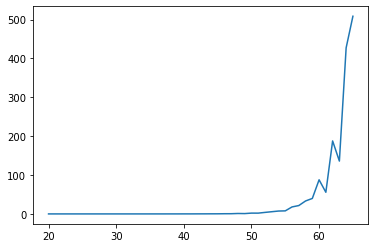

In [425]:
n_values = np.arange(n_start,n_end)
plt.plot(n_values , timeList)
plt.show()

## Cypher Chosen Attack

In [18]:
'''
Steps :
C` = C * (r^e) mod n
Y  = decrypt(C` , d , n)
M  = Y *(r ^-1) mod n
'''
def cipherChosenAttack(cipher, e ,d ,  n):
    # 1. choose r randomly from 1 to n ->gcd(r,n) =1
    r = random.randint(1,n)     
    while  GCD(r,n) != 1:
        r = random.randint(2,n)
    # 2. calc C` = C * (r^e) mod n 
    c_dash = ( (ConvertToInt(cipher) % n)  *  (PowerMod(r, e , n)) ) % n
    
    # 3. calc Y = (C` ^d) % n
    Y = PowerMod(c_dash , d , n )

    # 4. get M = (Y *(r^-1)) % n 
    r_inverse =  InverseModulo(r, n)
    M = ( Y * r_inverse) %n
    
    return ConvertToStr(M)

def test_cipher_chosen(keySize , message):
    p ,q =generate_two_prime_numbers(keySize // 2)
    (e,d,n) = RSA_key_generator(p,q)

    # Encrypt the Msg
    cypher = Encrypt_no_split(message,n,e)

    if (n.bit_length() < ConvertToInt(message).bit_length()):
        print('msg is bigger than key please choose a bigger key')

    else :
        #attacked msg
        attacked_msg = cipherChosenAttack( ConvertToStr(cypher) , e , d , n)
        #print
        print(f'attacked msg \t= { (attacked_msg)}')
        print(f'real \t\t= { message }')
        print(f'n {n.bit_length()} bits\nm {ConvertToInt(message).bit_length()} bits ')

## Test Cipher Chosen Attack

In [21]:
message = "omar mohamed ahmed sdfl;kjm"
keySize = 4096
test_cipher_chosen(keySize , message)

attacked msg 	|| omar mohamed ahmed sdfl;kjm
real 		|| omar mohamed ahmed sdfl;kjm
n 4095 bits
m 215 bits 


In [ ]:
maxCharactersToEncrypt (n):
  numberOfChars = 0
    n= n//256            //256 is the base because we have 256 different chars 
    while(n > 0):
        noChar += 1
        n= n// 256

